# Experimento: Classificador de Diabetes

### Importação dos Conjuntos de Dados
A função **read_csv()** permite que possa ser importado os arquivos CSV.  
Na fase de Pré-processamento foram salvos os conjuntos de series, treino e teste no diretório *Files*. 

In [61]:
import pandas as pd

x_train = pd.read_csv('Files/X_train.csv')
x_test = pd.read_csv('Files/X_test.csv')
y_train = pd.read_csv('Files/y_train.csv')
y_test = pd.read_csv('Files/y_test.csv')

x = pd.read_csv('Files/series_x.csv')
y = pd.read_csv('Files/series_y.csv')

## Processamento
*** 

### Treinamento
Este treinamento produz três modelos baseados nos algoritmso de Árvore de Decisão, Floresta Aleatória e Rede Neural.  
Um exemplo complementar da biblioteca scikit-learn pode ser encontrado em https://scikit-learn.org/stable/modules/tree.html#classification

In [62]:
from sklearn.tree import DecisionTreeClassifier # Importando classificador
from sklearn.ensemble import RandomForestClassifier # Importando classificador
from sklearn.neural_network import MLPClassifier # Importando classificador
import joblib # Importando biblioteca para salvar e carregar objetos complexos
import os # Importando para manipulação de diretórios e arquivos no sistema operacional

# Árvore de Decisão
clf_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1)
clf_tree.fit(x_train, y_train.values.ravel())

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(x_train, y_train.values.ravel())

# Rede Neural (MLP)
clf_mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=5000, random_state=42)
clf_mlp.fit(x_train, y_train.values.ravel())

# Salva os modelos treinados
os.makedirs('Model', exist_ok=True)
joblib.dump(clf_tree, 'Model/modelo_arvore_decisao.pkl')
joblib.dump(clf_rf, 'Model/modelo_random_forest.pkl')
joblib.dump(clf_mlp, 'Model/modelo_mlp.pkl')

['Model/modelo_mlp.pkl']

Como resultado do aprendizado, obtemos a seguinte árvore:

[Text(0.622093023255814, 0.9444444444444444, 'Polyuria_Yes <= 0.5\nsamples = 100.0%\nvalue = [0.401, 0.599]\nclass = Negative'),
 Text(0.36046511627906974, 0.8333333333333334, 'Gender_Male <= 0.5\nsamples = 51.4%\nvalue = [0.722, 0.278]\nclass = Positive'),
 Text(0.49127906976744184, 0.8888888888888888, 'True  '),
 Text(0.1511627906976744, 0.7222222222222222, 'Alopecia_Yes <= 0.5\nsamples = 12.1%\nvalue = [0.318, 0.682]\nclass = Negative'),
 Text(0.09302325581395349, 0.6111111111111112, 'Age <= 34.5\nsamples = 9.1%\nvalue = [0.152, 0.848]\nclass = Negative'),
 Text(0.046511627906976744, 0.5, 'muscle stiffness_Yes <= 0.5\nsamples = 2.2%\nvalue = [0.5, 0.5]\nclass = Positive'),
 Text(0.023255813953488372, 0.3888888888888889, 'samples = 1.1%\nvalue = [1.0, 0.0]\nclass = Positive'),
 Text(0.06976744186046512, 0.3888888888888889, 'samples = 1.1%\nvalue = [0.0, 1.0]\nclass = Negative'),
 Text(0.13953488372093023, 0.5, 'Irritability_Yes <= 0.5\nsamples = 6.9%\nvalue = [0.04, 0.96]\nclass = Ne

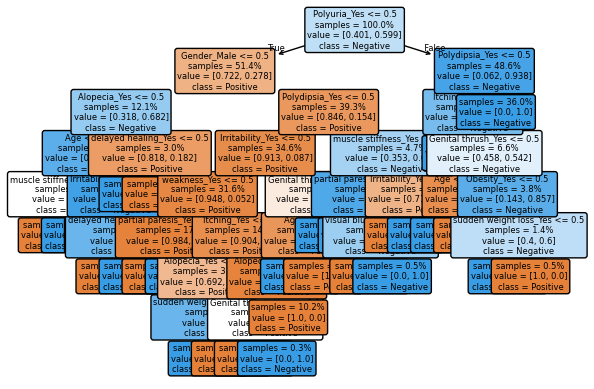

In [63]:
from sklearn import tree
tree.plot_tree(clf,rounded=True,feature_names=x.columns,fontsize=6,class_names=['Positive','Negative'],proportion=True, impurity=False, filled=True, label='all')

### Teste

In [64]:
# Faz a predição dos valores para teste
y_pred_tree = clf_tree.predict(x_test)
y_pred_rf = clf_rf.predict(x_test)
y_pred_mlp = clf_mlp.predict(x_test)

# Salva as predições em um arquivo CSV
pd.DataFrame(y_pred_tree, columns=['Predicted_Tree']).to_csv('Files/predicted_y_tree.csv', index=False)
pd.DataFrame(y_pred_rf, columns=['Predicted_RF']).to_csv('Files/predicted_y_rf.csv', index=False)
pd.DataFrame(y_pred_mlp, columns=['Predicted_MLP']).to_csv('Files/predicted_y_mlp.csv', index=False)